In [970]:
import pandas as pd
from ipycanvas import Canvas, hold_canvas
import numpy as np
from pathlib import Path
from Player import Player
from Route import Route
import Metric
import Model

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
player_pos = pd.read_csv("2024_SMT_Data_Challenge\player_pos\Season_1884\Home1A\Vis1AK\day_008\player_pos.csv")
game_info = pd.read_csv("2024_SMT_Data_Challenge\game_info\Season_1884\Home1A\Vis1AK\day_008\game_info.csv")
ball_pos = pd.read_csv("2024_SMT_Data_Challenge\\ball_pos\Season_1884\Home1A\Vis1AK\day_008\\ball_pos.csv")
game_events = pd.read_csv("2024_SMT_Data_Challenge\game_events\Season_1884\Home1A\Vis1AK\day_008\game_events.csv")

In [64]:
game_events[(game_events["event_code"] == 2) & (game_events["player_position"] == 8)]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
31,1884_008_Vis1AK_Home1A,6,24,6,296628,8,2
132,1884_008_Vis1AK_Home1A,37,30,37,1297528,8,2
314,1884_008_Vis1AK_Home1A,83,43,83,2963626,8,2
437,1884_008_Vis1AK_Home1A,112,51,112,3875826,8,2
451,1884_008_Vis1AK_Home1A,115,52,115,3943226,8,2
540,1884_008_Vis1AK_Home1A,139,57,139,4931426,8,2
627,1884_008_Vis1AK_Home1A,160,64,160,5863626,8,2
676,1884_008_Vis1AK_Home1A,169,67,169,6221276,8,2
728,1884_008_Vis1AK_Home1A,181,73,181,6675126,8,2
758,1884_008_Vis1AK_Home1A,190,75,190,7009776,8,2


In [65]:
play6 = game_events[game_events["play_id"] == 6]

In [66]:
play6abridged = play6.merge(ball_pos, on = "timestamp")

In [67]:
play6abridged = play6abridged.merge(player_pos, on = ["timestamp", "player_position"], suffixes= ("y",))

In [68]:
play6abridged = play6abridged[["play_id_x", "timestamp", "player_position", "event_code", "ball_position_x", "ball_position_y", "ball_position_z", "field_x", "field_y"]]

In [69]:
play6

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
29,1884_008_Vis1AK_Home1A,6,24,6,290678,1,1
30,1884_008_Vis1AK_Home1A,6,24,6,291078,10,4
31,1884_008_Vis1AK_Home1A,6,24,6,296628,8,2
32,1884_008_Vis1AK_Home1A,6,24,6,297678,8,3
33,1884_008_Vis1AK_Home1A,6,24,6,299428,255,16
34,1884_008_Vis1AK_Home1A,6,24,6,299578,6,2
35,1884_008_Vis1AK_Home1A,6,24,6,301228,0,5


In [70]:
df = play6.merge(game_info, on = "play_per_game", suffixes = ["_a", "_b"])
df = df.merge(ball_pos, on = "timestamp", suffixes= ["_c", "_d"])
df = df.merge(player_pos, on = "timestamp", suffixes= ["_e", "_f"])
play6[play6["event_code"] == 2]["player_position"].iloc[0]
291078	

291078

In [71]:
play6

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
29,1884_008_Vis1AK_Home1A,6,24,6,290678,1,1
30,1884_008_Vis1AK_Home1A,6,24,6,291078,10,4
31,1884_008_Vis1AK_Home1A,6,24,6,296628,8,2
32,1884_008_Vis1AK_Home1A,6,24,6,297678,8,3
33,1884_008_Vis1AK_Home1A,6,24,6,299428,255,16
34,1884_008_Vis1AK_Home1A,6,24,6,299578,6,2
35,1884_008_Vis1AK_Home1A,6,24,6,301228,0,5


In [72]:
play6coords = player_pos[(player_pos["player_position"] == 8) & (player_pos["timestamp"] >= 291078) & (player_pos["timestamp"] <= 296628)]
#list(zip(play6coords["field_x"], play6coords["field_y"]))
play6coords

,game_str,play_id,timestamp,player_position,field_x,field_y
5193,1884_008_Vis1AK_Home1A,6,291078,8,-4.7460,286.0152
5207,1884_008_Vis1AK_Home1A,6,291128,8,-4.6383,285.9066
5221,1884_008_Vis1AK_Home1A,6,291178,8,-4.5210,285.7980
5235,1884_008_Vis1AK_Home1A,6,291228,8,-4.3929,285.6909
5249,1884_008_Vis1AK_Home1A,6,291278,8,-4.2525,285.5865
...,...,...,...,...,...,...
6691,1884_008_Vis1AK_Home1A,6,296428,8,82.1850,321.0192
6705,1884_008_Vis1AK_Home1A,6,296478,8,82.7688,321.3156
6719,1884_008_Vis1AK_Home1A,6,296528,8,83.3565,321.6087
6733,1884_008_Vis1AK_Home1A,6,296578,8,83.4822,321.6708


In [73]:
# canv = Canvas(width  = 400, height = 400)
# canv.scale(x = 1, y = -1)
# canv.translate(x = canv.width / 2, y = -canv.height)
# colors = np.array(range(play6coords.shape[0])) * 255 / play6coords.shape[0]
# colors = list(map(lambda x: ([255 - x, 255 - x, 255]), colors))
# canv.fill_styled_circles(play6coords["field_x"].to_numpy(), play6coords["field_y"].to_numpy(), color = colors, radius = 1)
# canv

In [74]:
play6

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
29,1884_008_Vis1AK_Home1A,6,24,6,290678,1,1
30,1884_008_Vis1AK_Home1A,6,24,6,291078,10,4
31,1884_008_Vis1AK_Home1A,6,24,6,296628,8,2
32,1884_008_Vis1AK_Home1A,6,24,6,297678,8,3
33,1884_008_Vis1AK_Home1A,6,24,6,299428,255,16
34,1884_008_Vis1AK_Home1A,6,24,6,299578,6,2
35,1884_008_Vis1AK_Home1A,6,24,6,301228,0,5


In [76]:
r = Route(play6, player_pos, ball_pos, game_info)

In [77]:
Player.get_existing_players()[8743].get_levels()

{'1A': 9}

In [78]:
r.get_total_length()

96.96957488866856

In [79]:
r.get_ideal_length()

95.29332569393306

In [80]:
r.get_score()

0.9827136584164671

In [81]:
(play6["player_position"] >= 7) & (play6["player_position"] <= 9) & (play6["event_code"] == 2)

29    False
30    False
31     True
32    False
33    False
34    False
35    False
dtype: bool

In [593]:
relevant_plays_df = game_events.groupby("play_per_game").filter(Metric.route_eff_rel)

In [594]:
relevant_plays_df

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
9,1884_008_Vis1AK_Home1A,4,22,4,88378,1,1
10,1884_008_Vis1AK_Home1A,4,22,4,88778,10,4
11,1884_008_Vis1AK_Home1A,4,22,4,92978,255,16
12,1884_008_Vis1AK_Home1A,4,22,4,93078,9,9
13,1884_008_Vis1AK_Home1A,4,22,4,93778,255,16
...,...,...,...,...,...,...,...
835,1884_008_Vis1AK_Home1A,203,84,203,7631926,255,16
836,1884_008_Vis1AK_Home1A,203,84,203,7633826,8,2
837,1884_008_Vis1AK_Home1A,203,84,203,7636276,8,3
838,1884_008_Vis1AK_Home1A,203,84,203,7637026,6,2


In [270]:
4 not in game_events["event_code"].values

False

In [272]:
Player.clear_existing_players()
for play_num in relevant_plays_df["play_per_game"].unique():
    Route(relevant_plays_df[relevant_plays_df["play_per_game"] == play_num], player_pos, ball_pos, game_info)

Players cleared


In [273]:
Player.get_existing_players()

{5599: <Player.Player at 0x19fc69cec80>,
 8743: <Player.Player at 0x19fc69ce410>,
 963: <Player.Player at 0x19fc69cdc00>,
 537: <Player.Player at 0x19fc69cd3f0>,
 435: <Player.Player at 0x19fc69cc430>,
 5485: <Player.Player at 0x19fc7852530>}

In [627]:
Player.get_existing_players()[537].get_routes()[0].visualize()

Canvas(height=400, width=400)

In [86]:
play6.head((play6.reset_index()["event_code"] == 2).idxmax())

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
29,1884_008_Vis1AK_Home1A,6,24,6,290678,1,1
30,1884_008_Vis1AK_Home1A,6,24,6,291078,10,4


In [87]:
# import pygame
# pygame.init()
# screen = pygame.display.set_mode((1280, 720))
# clock = pygame.time.Clock()
# running = True

# while running:
#     # poll for events
#     # pygame.QUIT event means the user clicked X to close your window
#     for event in pygame.event.get():
#         if event.type == pygame.QUIT:
#             running = False

#     # fill the screen with a color to wipe away anything from last frame
#     screen.fill("purple")

#     # RENDER YOUR GAME HERE
#     pygame.draw.circle(screen, (0, 0, 0), (0, 0), 10)

#     # flip() the display to put your work on screen
#     pygame.display.flip()

#     clock.tick(60)  # limits FPS to 60

# pygame.quit()

In [100]:
import os

In [113]:
os.listdir(r"2024_SMT_Data_Challenge\ball_pos")

['Season_1883', 'Season_1884']

In [114]:
from FindGameFiles import FindGameFiles

In [164]:
files = FindGameFiles()

In [166]:
len(files)

339

In [606]:
Route.is_relevant()

In [628]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 2 of 339
Finished game 3 of 339
Finished game 4 of 339
Finished game 5 of 339
Finished game 6 of 339
Finished game 7 of 339
Finished game 8 of 339
Finished game 9 of 339
Finished game 10 of 339
Finished game 11 of 339
Finished game 12 of 339
Finished game 13 of 339
Finished game 14 of 339
Finished game 15 of 339
Finished game 16 of 339
Finished game 17 of 339
Finished game 18 of 339
Finished game 19 of 339
Finished game 20 of 339
Finished game 21 of 339
Finished game 22 of 339
Finished game 23 of 339
Finished game 24 of 339
Finished game 25 of 339
Finished game 26 of 339
Finished game 27 of 339
Finished game 28 of 339
Finished game 29 of 339
Finished game 30 of 339
Finished game 31 of 339
Finished game 32 of 339
Finished game 33 of 339
Finished game 34 of 339
Finished game 35 of 339
Finished game 36 of 339
Finished game 37 of 339
Finished game 38 of 339
Finished game 39 of 339
Fin

True

In [614]:
player_dic = Player.get_existing_players()

In [615]:
player_dic

{594: <Player.Player at 0x1a045a9a5f0>,
 492: <Player.Player at 0x1a045a99a20>,
 -1: <Player.Player at 0x1a045a99000>,
 4944: <Player.Player at 0x1a045b29ae0>,
 7377: <Player.Player at 0x1a045b2a500>,
 537: <Player.Player at 0x1a045b2af20>,
 7464: <Player.Player at 0x1a045b2bdf0>,
 495: <Player.Player at 0x1a045b54820>,
 7469: <Player.Player at 0x1a045e5e3b0>,
 2773: <Player.Player at 0x1a045e85ed0>,
 7002: <Player.Player at 0x1a045f83a60>,
 2132: <Player.Player at 0x1a045f83d30>,
 5902: <Player.Player at 0x1a045f998a0>,
 435: <Player.Player at 0x1a046069ae0>,
 6645: <Player.Player at 0x1a0462519f0>,
 9474: <Player.Player at 0x1a046252530>,
 4521: <Player.Player at 0x1a046265c30>,
 2389: <Player.Player at 0x1a0462bf8b0>,
 7741: <Player.Player at 0x1a046375bd0>,
 2876: <Player.Player at 0x1a04639be50>,
 6060: <Player.Player at 0x1a0463ad4b0>,
 5062: <Player.Player at 0x1a04642e950>,
 4117: <Player.Player at 0x1a0465cb1f0>,
 4276: <Player.Player at 0x1a046683eb0>,
 2211: <Player.Player a

In [616]:
player_dic[594].get_routes()[0]

In [358]:
for player in player_dic:
    if len(player_dic[player].get_routes()) == 0:
        print(len(player_dic[player].get_routes()))

In [617]:
averages = {}
for player in player_dic:
    averages[player] = (player_dic[player].find_average_score(), player_dic[player].get_num_routes())

In [618]:
averages

{594: (0.8793671544944468, 34),
 492: (0.9225500423312404, 219),
 -1: (0.9189636507520563, 1605),
 4944: (0.7793496573054843, 2),
 7377: (0.9626303765739179, 5),
 537: (0.9190588211222486, 177),
 7464: (0.9897907297188642, 1),
 495: (0.9301191825902237, 201),
 7469: (0.953968035678359, 8),
 2773: (0.9641594587209538, 5),
 7002: (0.997956533116713, 1),
 2132: (0.7135478784872561, 1),
 5902: (0.9379832510860721, 1),
 435: (0.8889721746058015, 171),
 6645: (0.9816938932617967, 4),
 9474: (0.9588520022256201, 4),
 4521: (0.9784584235256538, 3),
 2389: (0.8264341865304671, 1),
 7741: (0.8520165249136409, 6),
 2876: (0.8483649206076531, 8),
 6060: (0.9591843593334687, 5),
 5062: (0.934055188348038, 2),
 4117: (0.997391651051907, 1),
 4276: (0.9819263204575979, 8),
 2211: (0.9229772147359162, 10),
 8635: (0.9721605418917063, 3),
 2444: (0.9639090590776634, 6),
 7953: (0.869216425013256, 3),
 6454: (0.9595967585197996, 5),
 7236: (0.902660371174308, 4),
 6105: (0.9635316581582984, 2),
 6710: (

In [427]:
not_neg1 = 0
neg1 = 0
for key in averages:
    if key == -1:
        neg1 += averages[key][1]
    else:
        not_neg1 += averages[key][1]
(not_neg1, neg1)

(6818, 1605)

In [364]:
for route in player_dic[-1].get_routes():
    if route.play["game_str"].iloc[0] == "1884_063_Vis2AM_Home2A":
        print(route.play)

                   game_str  play_id  at_bat  play_per_game  timestamp  \
234  1884_063_Vis2AM_Home2A       62      19             62    1918437   
235  1884_063_Vis2AM_Home2A       62      19             62    1918899   
236  1884_063_Vis2AM_Home2A       62      19             62    1925235   
237  1884_063_Vis2AM_Home2A       62      19             62    1925367   

     player_position  event_code  
234                1           1  
235               10           4  
236                9           2  
237                0           5  
                   game_str  play_id  at_bat  play_per_game  timestamp  \
306  1884_063_Vis2AM_Home2A       82      24             82    2514682   
307  1884_063_Vis2AM_Home2A       82      24             82    2515111   
308  1884_063_Vis2AM_Home2A       82      24             82    2516299   
309  1884_063_Vis2AM_Home2A       82      24             82    2517058   
310  1884_063_Vis2AM_Home2A       82      24             82    2517652   
311  1884_

In [631]:
routes_df = Route.get_all_routes_df()

<Axes: xlabel='ideal_length', ylabel='score'>

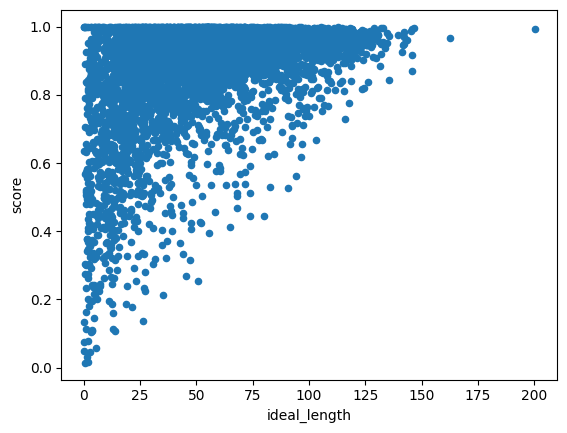

In [636]:
routes_df.plot(kind = "scatter", x = "ideal_length", y = "score")

In [642]:
routes_df.sort_values("score")["route_obj"].iloc[-1].visualize()

Canvas(height=400, width=400)

In [621]:
home_only_routes = routes_df[routes_df["player_id"].apply(lambda x: len(str(x)) == 3)]

<Axes: xlabel='player_id'>

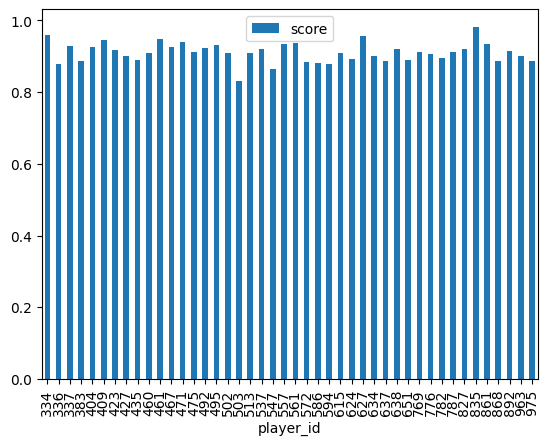

In [622]:
home_only_routes.groupby("player_id").agg({"level": "max", "score": "mean"}).plot(kind = "bar")

In [479]:
import PermHelpers

In [480]:
PermHelpers.calc_TVD(home_only_routes.groupby("player_id").agg({"level": "max", "score": "mean"}), home_only_routes["score"].mean())

0.4666179046064412

In [511]:
t = home_only_routes.copy(deep = True)
t["shuffled"] = t["player_id"].sample(frac = 1).values
PermHelpers.calc_TVD(t.groupby("shuffled").agg({"level": "max", "score": "mean"}), t["score"].mean())

0.6634048249218997

In [580]:
t = PermHelpers.permutation_tester(home_only_routes, "position", 1000)

Out of 1000 permutations, 14 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.014.
The observed statistic was 0.008825023264786902.
The average test statistic was 0.0037105012941114806


<Axes: xlabel='position'>

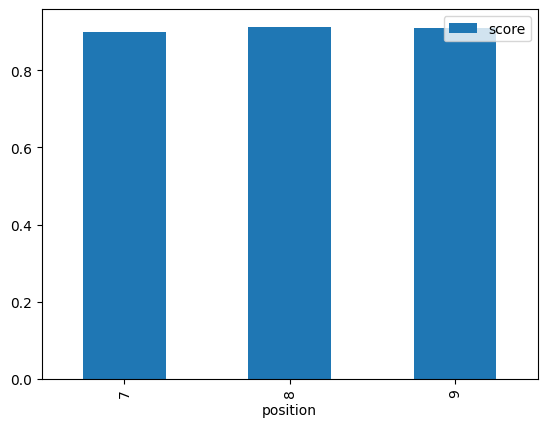

In [577]:
home_only_routes[["position", "score"]].groupby("position").mean().reset_index().plot(kind = "bar", x = "position", y = "score")

In [573]:
(.009187 + .005107 + .003356)*.5

0.008825000000000001

In [548]:
t[["shuffled", "score"]].groupby("shuffled").mean()

,score
shuffled,
7,0.905446
8,0.914528
9,0.902548


In [623]:
PermHelpers.calc_TVD(home_only_routes, "position")

0.008825023264786902

In [558]:
PermHelpers.calc_TVD(t[["shuffled", "score"]].groupby("shuffled").mean(), t["score"].mean())

0.0048209196541147414

<Axes: xlabel='direction', ylabel='score'>

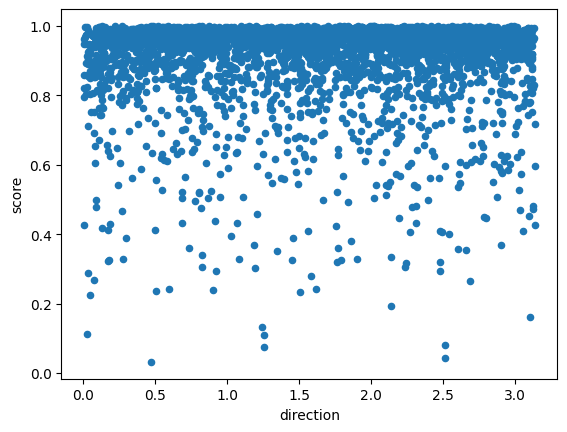

In [624]:
home_only_routes.plot(kind = "scatter", x = "direction", y = "score")

<Axes: xlabel='level'>

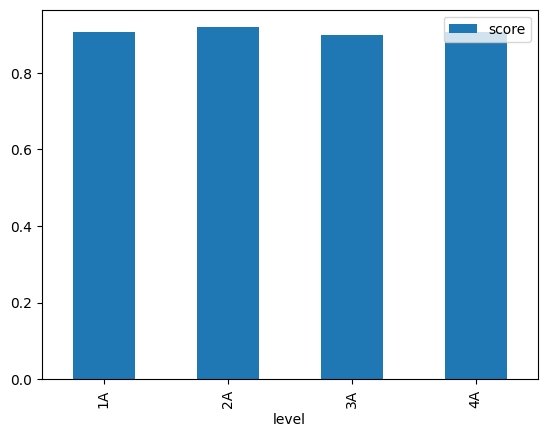

In [589]:
home_only_routes[["level", "score"]].groupby("level").mean().plot(kind = "bar")

In [654]:
Metric.route_efficiency.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 51 of 339
Finished game 101 of 339
no start coords
game skipped
Finished game 151 of 339
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
worked at least once
Finish

In [706]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


True

In [713]:
all_routes_df = Route.get_all_routes_df()

In [721]:
Metric.route_efficiency.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339
Out of 1000 permutations, 315 had a test statistic at least as

In [722]:
testr = Route.get_all_routes()[0]

In [727]:
pos = testr.get_coord_tuples()

<Axes: xlabel='xpos', ylabel='ypos'>

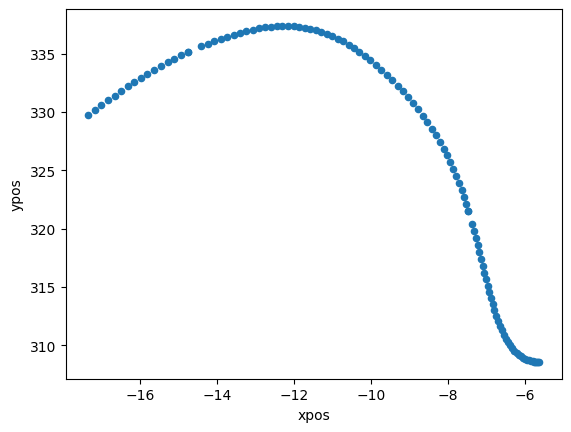

In [738]:
posdf = pd.DataFrame(columns = ["xpos", "ypos"], data = pos)
posdf.plot(kind = "scatter", x = "xpos", y = "ypos")

<Axes: xlabel='index', ylabel='mag'>

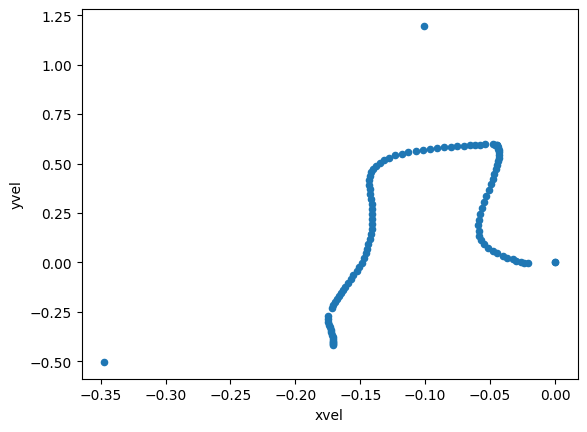

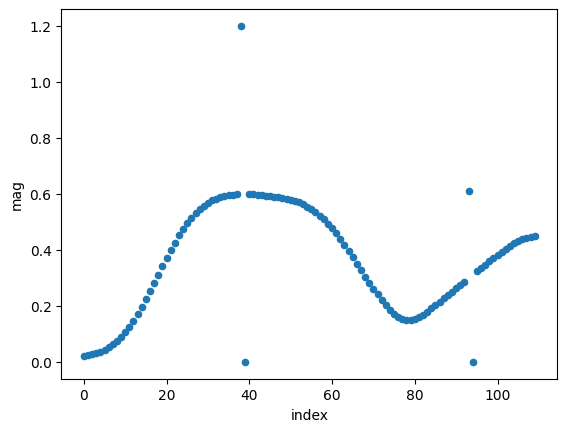

In [736]:
vel = []
for i in range(len(pos)-1):
    velvec = (pos[i+1][0] - pos[i][0], pos[i+1][1]-pos[i][1])
    vel.append((velvec[0], velvec[1], (velvec[0]**2 + velvec[1]**2)**.5))
veldf = pd.DataFrame(columns= ["xvel", "yvel", "mag"], data  = vel)
veldf.plot(kind = "scatter", x = "xvel", y = "yvel")
veldf = veldf.reset_index()
veldf.plot(kind = "scatter", x = "index", y = "mag")

<Axes: xlabel='index'>

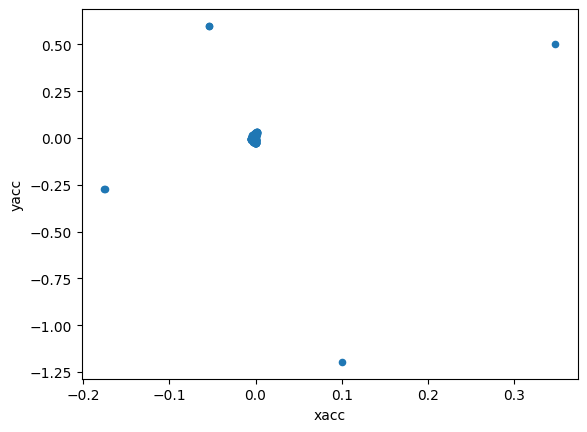

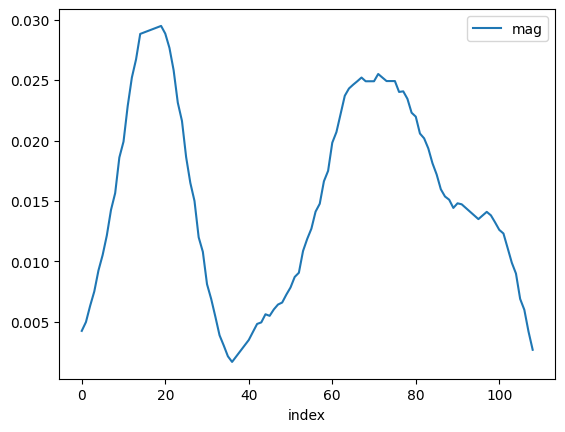

In [790]:
acc = []
for i in range(len(vel)-1):
    accvec = (vel[i+1][0] - vel[i][0], vel[i+1][1]-vel[i][1])
    acc.append((accvec[0], accvec[1], (accvec[0]**2 + accvec[1]**2)**.5))
accdf = pd.DataFrame(columns= ["xacc", "yacc", "mag"], data  = acc)
# accdf = accdf[
#     (accdf["xacc"] < .05) &
#     (accdf["xacc"] > -.05) &
#     (accdf["yacc"] > -.2) &
#     (accdf["yacc"] < .2)
# ]
accdf.plot(kind = "scatter", x = "xacc", y = "yacc")
accdf = accdf.reset_index()
accdf = accdf.sort_values("mag").iloc[:-10]
accdf = accdf.sort_values("index")
accdf.plot(kind = "line", x = "index", y = "mag")

In [752]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

<Axes: xlabel='index'>

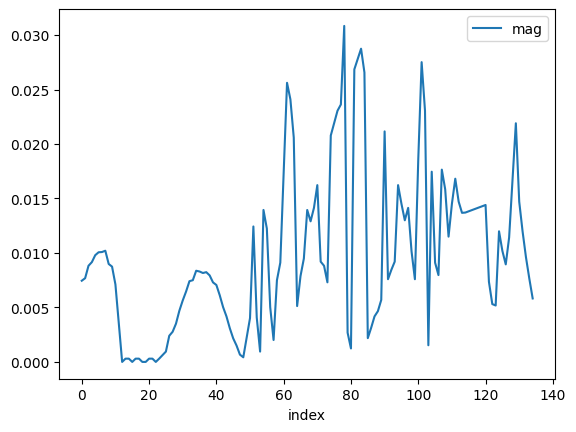

In [802]:
all_routes_df[all_routes_df["ideal_length"] >= 100]["route_obj"].iloc[5].visualize_accel()

<Axes: ylabel='Frequency'>

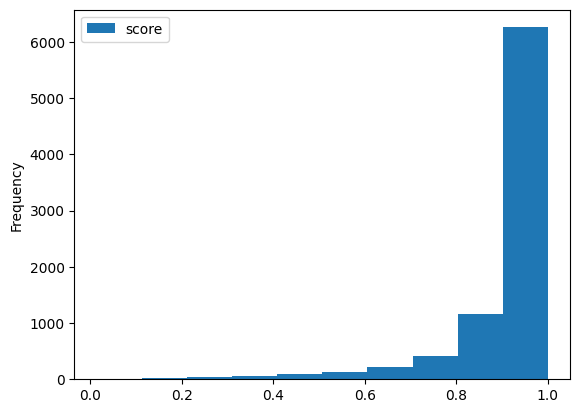

In [813]:
all_routes_df[["score"]].plot(kind = "hist")

<Axes: ylabel='Frequency'>

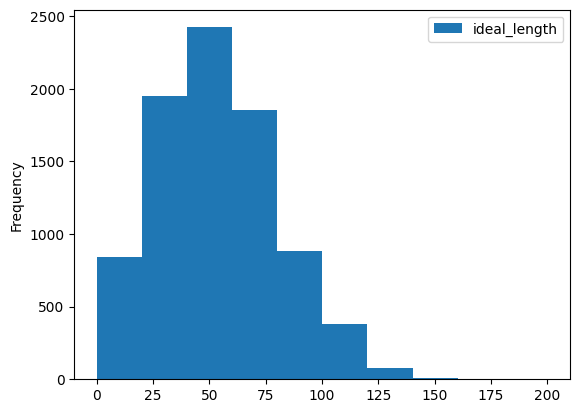

In [815]:
all_routes_df[["ideal_length"]].plot(kind = "hist")

In [816]:
Metric.break_metric.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 829 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.829.
This would NOT be considered statistically signifiant
-----
The observed statistic was 0.18528578214122013.
The average test statistic was 0.22958426426685738


In [820]:
t = Route.get_all_routes_df()[["score"]]

<Axes: ylabel='Frequency'>

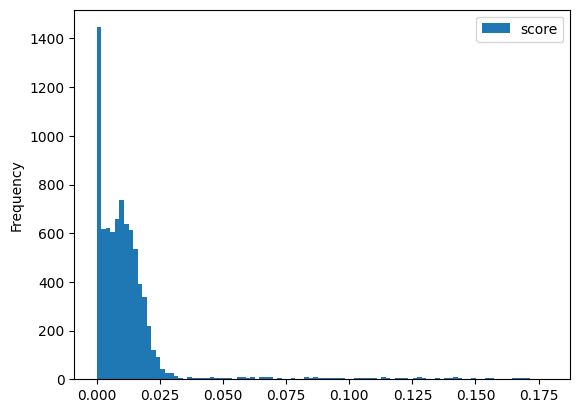

In [829]:
t.sort_values("score").iloc[:-300].plot(kind = "hist", bins = 100)

In [830]:
Metric.id_metric.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


Out of 1000 permutations, 0 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.0.
This would be considered statistically significant
-----
The observed statistic was 3165.3160070880085.
The average test statistic was 659.3705795749261


In [831]:
t = Route.get_all_routes_df()

In [875]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [876]:
df = Route.get_all_routes_df()

<Axes: xlabel='direction', ylabel='score'>

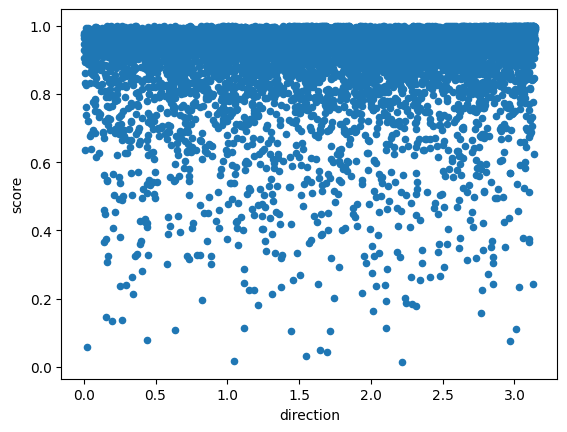

In [895]:
df.plot(kind = "scatter", x = "direction", y = "score")


In [896]:
Route.find_all_relevant(Metric.break_metric)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:75: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [897]:
df = Route.get_all_routes_df()

In [905]:
PermHelpers.permutation_tester(df[(df["ideal_length"] > 100) & (df["player_id"].apply(lambda x: len(str(x)) == 3))], "player_id", 1000)

Out of 1000 permutations, 185 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.185.
This would NOT be considered statistically signifiant
-----
The observed statistic was 0.8574052355298355.
The average test statistic was 0.7859941277844018


,player_id,score,shuffled
528,492,0.013315,502
646,495,0.006661,513
710,492,0.000424,638
896,651,0.010151,572
956,637,0.000300,495
...,...,...,...
8362,502,0.009159,868
8369,502,0.324840,975
8372,427,0.008653,963
8382,427,0.009144,651


In [967]:
p = df["route_obj"].iloc[11].get_play()
p = p.loc[(p["event_code"] == 4).idxmax():(p["event_code"] == 2).idxmax()]
if 255 not in p["player_position"].values:
    print(p["timestamp"].iloc[-1] - p["timestamp"].iloc[0])
else:
    print("bounced")
    bounceonly = p.loc[:(p["player_position"] == 255).idxmax()]
    print(bounceonly["timestamp"].iloc[-1] - bounceonly["timestamp"].iloc[0])

bounced
1150


In [955]:
df["route_obj"].iloc[17].visualize()

Canvas(height=400, width=400)

In [1080]:
Route.find_all_relevant(Metric.route_efficiency)

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:80: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_per_game").filter(Route.is_relevant())


True

In [1081]:
ml_data = Route.get_all_routes_df()

In [1082]:
ml_data["hang_time"] = ml_data["route_obj"].apply(lambda x: x.get_hang_time())

In [1083]:
ml_data["was_caught"] = ml_data["route_obj"].apply(lambda x: int(x.get_was_caught()))

In [1084]:
model = Model.create_model(ml_data)

In [1085]:
with_pred = pd.concat([ml_data, pd.Series(model.predict(ml_data[["direction", "ideal_length", "hang_time"]])).rename("pred")], axis = 1)

In [1086]:
1 - np.abs(with_pred["was_caught"] - with_pred["pred"]).sum() / with_pred.shape[0]

0.9322094265701056

In [1087]:
with_proba = pd.concat([ml_data, pd.DataFrame(model.predict_proba(ml_data[["direction", "ideal_length", "hang_time"]]))], axis = 1)

In [1094]:
from Animation import plot_animation
from IPython.display import HTML

In [1105]:
t = with_proba[with_proba["was_caught"] == 1].sort_values(1)["route_obj"].iloc[0]

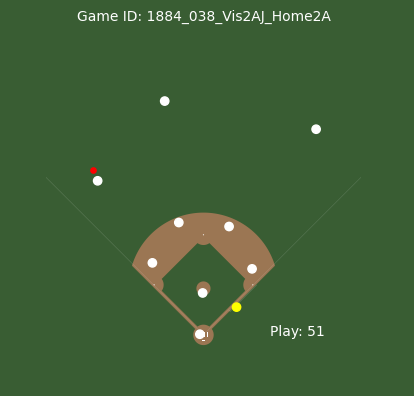

In [1109]:
t.visualize()